# Predict a feature in space by classificaation

# Load and take a look at the data

In [2]:
# Load relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load data
ds=pd.read_csv('Skyserver.csv')

In [4]:
ds.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [5]:
ds.shape

(10000, 18)

In [6]:
ds.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

# Check and treat null values

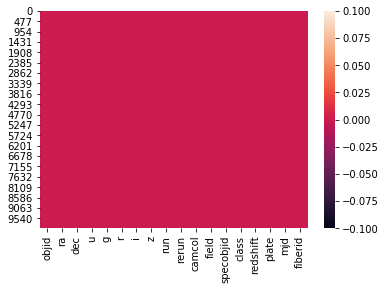

In [7]:
sns.heatmap(ds.isnull())

# No null values present.

In [8]:
ds.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

# Check correlation

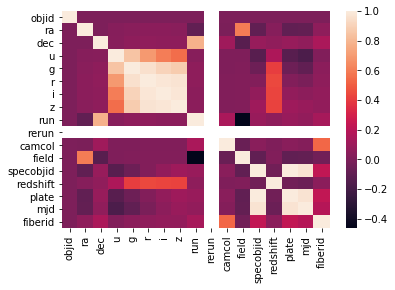

In [9]:
dscor=ds.corr()
sns.heatmap(dscor)

# Summary statistics

In [10]:
ds.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


Some of the columns have very large standard deviation

# Data visualizations

In [11]:
ds.groupby('class')['class'].count()

class
GALAXY    4998
QSO        850
STAR      4152
Name: class, dtype: int64

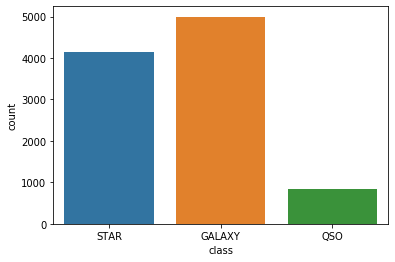

In [12]:
# Show the amounts of different object types in space
sns.countplot(ds['class'])

Galaxies and stars are far more common in the dataset.

# Check eveness of dataset

In [13]:
ds.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [14]:
class_counts = ds['class'].value_counts()
class_counts

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

In [15]:
class_percentage = ds['class'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
class_percentage

GALAXY    50.0%
STAR      41.5%
QSO        8.5%
Name: class, dtype: object

The data is not distributed evenly over the target column which will affect classification models' accuracy scores.

# Encode categorical columns to numeric values

In [16]:
ds.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [17]:
eds=ds

In [18]:
# Encode class column to numeric values
from sklearn.preprocessing import LabelEncoder

Encoderds = LabelEncoder() 
eds['class'] = Encoderds.fit_transform(eds['class'])

In [19]:
eds.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,2,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,2,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,0,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,2,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,2,0.000590,3306,54922,512


# Check correlation after encoding

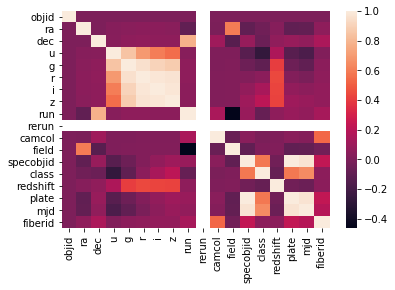

In [20]:
dscor=eds.corr()
sns.heatmap(dscor)

The best correlated colums with the target column are:
    mjd,plate,specobjid
after that:
    z,i
next:
    r,ra,dec,camcol,field, fiberid
    
u is negatively correlated to the target column

# Drop irrelevant columns

In [21]:
ds.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

The fields that have the best correlation with the target column are:
    mjd,plate,specobjid
after that:
    z,i
next:
    r,ra,dec,camcol,field, fiberid
    
u is negatively correlated to the target column

In [22]:
# Drop irrelevant (poorly correlated) columns - dataset renamed to nds (new dataset)
nds=ds.drop(columns=['objid', 'u', 'g', 'run', 'rerun', 'camcol',
       'field', 'redshift', 'fiberid'])

# Find and remove outliers

In [23]:
nds.shape

(10000, 9)

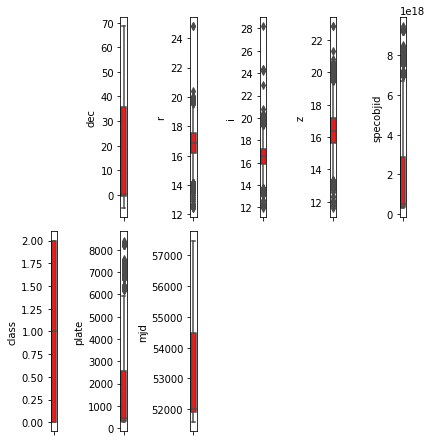

In [24]:
# Show boxplots for all columns, check outliers
collist=nds.columns.values
ncol=6
nrows=10

plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(nds[collist[i]], color='red', orient='v')
    plt.tight_layout()

In [25]:
# Remove outliers - dataset renamed to cds (clean dataset)
from scipy import stats
from scipy.stats import zscore

z_score=abs(zscore(nds))
print(nds.shape)
cds=nds.loc[(z_score<3).all(axis=1)]
print(cds.shape)

(10000, 9)
(9153, 9)


# Check and adjust skewness

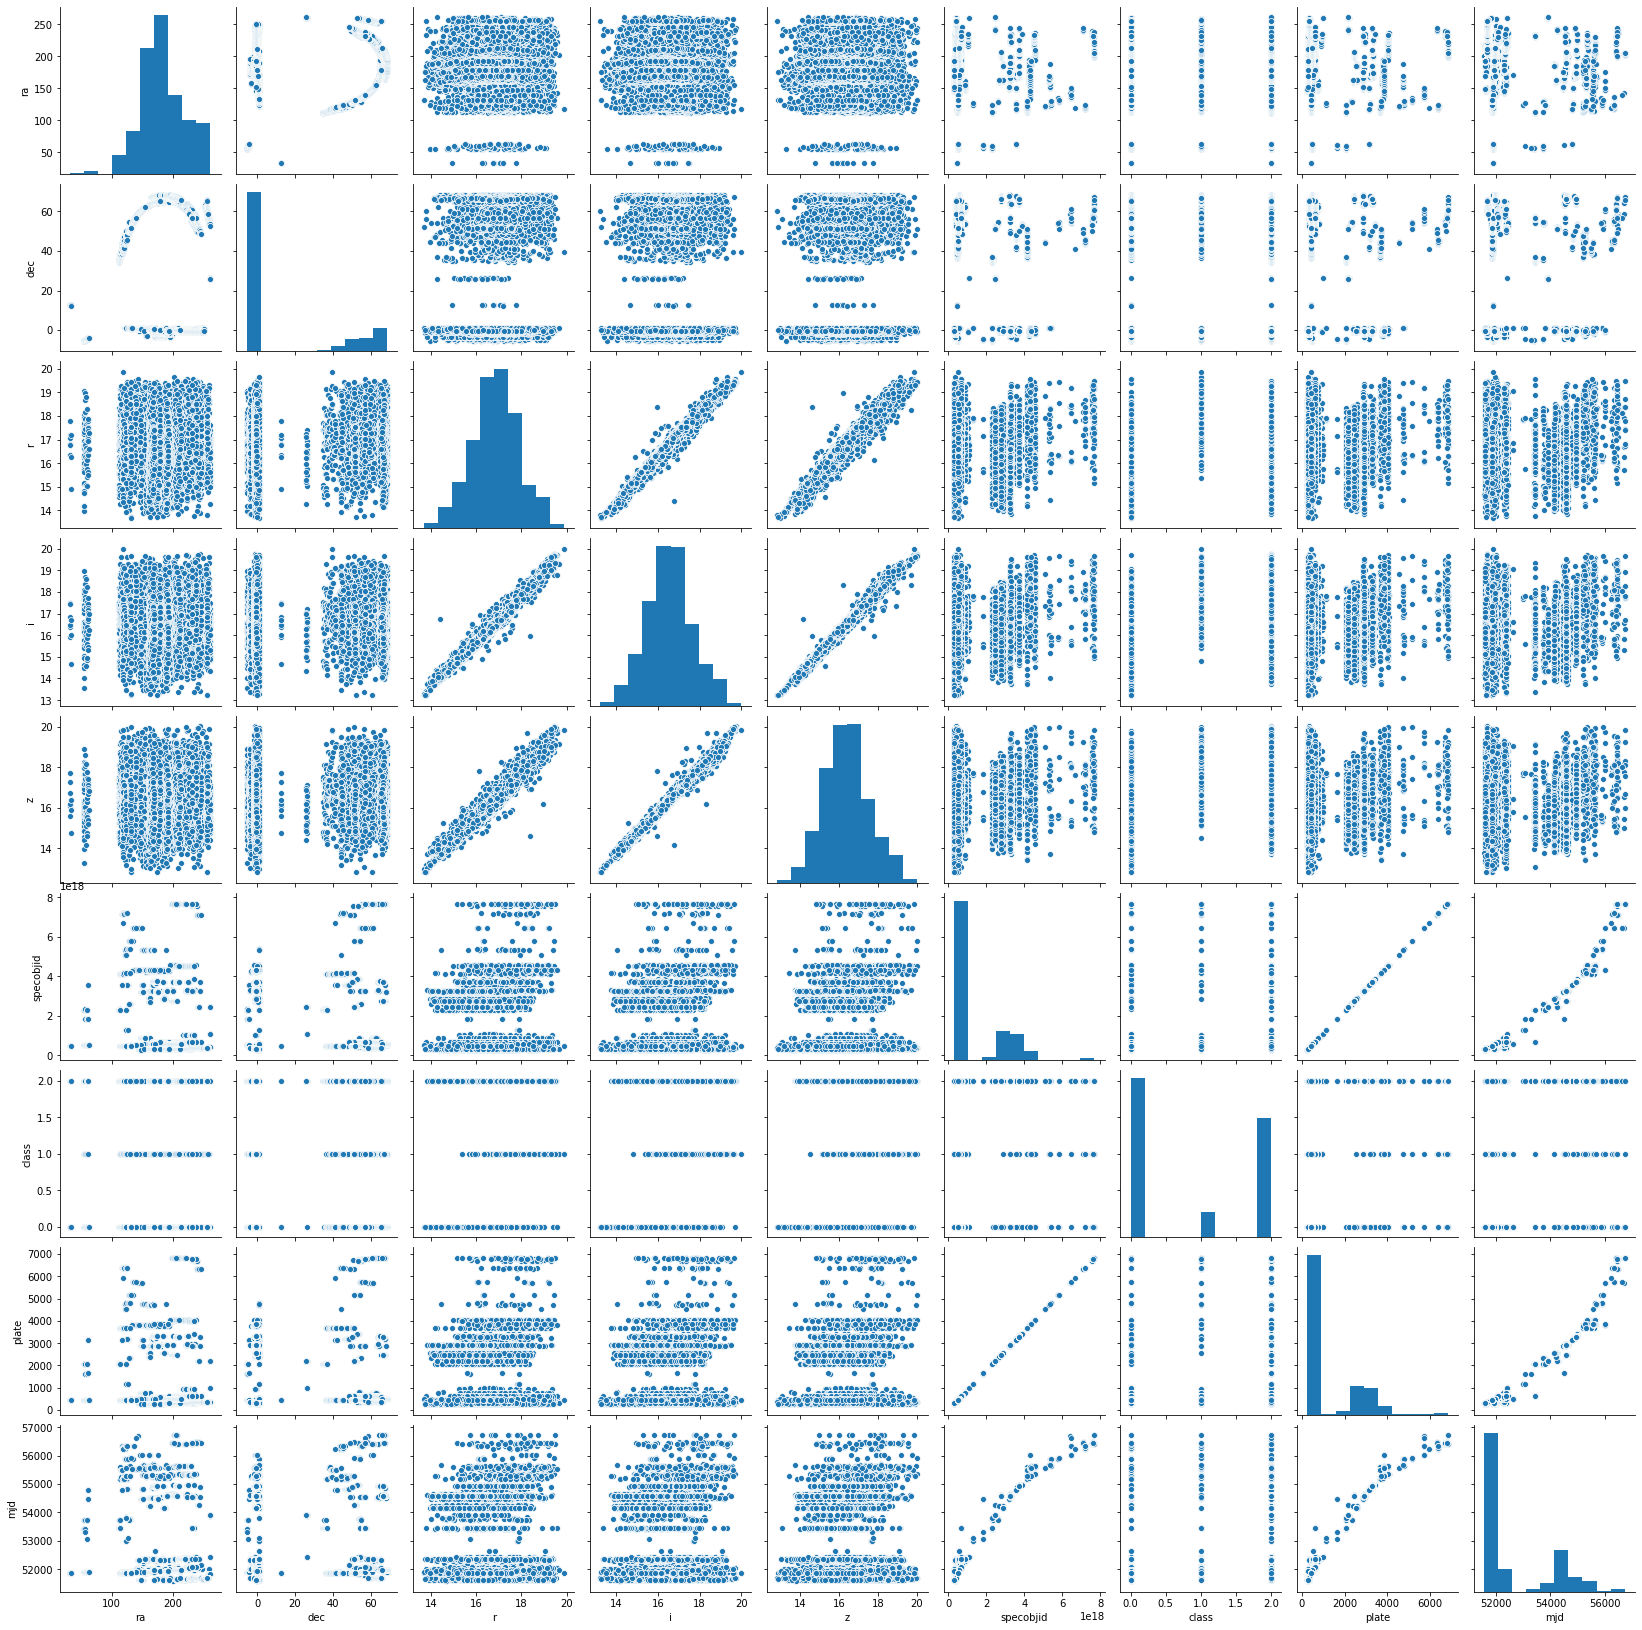

In [26]:
# Checking pairplots
sns.pairplot(cds)
plt.show()

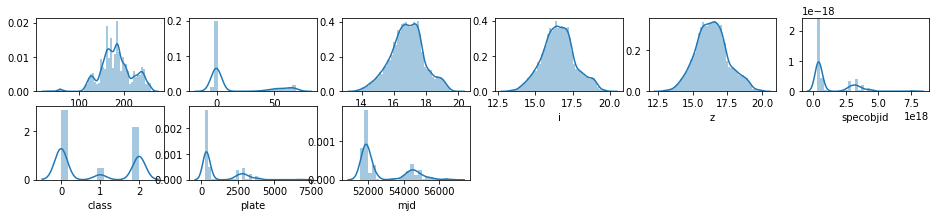

In [27]:
# Show distribution plots for all columns
collist=cds.columns.values
ncol=6
nrows=10

plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(cds[collist[i]])

In [38]:
# Show skewness (less than 0.55 is ok)
cds.skew()

ra          -0.143991
dec          1.203578
r           -0.070527
i            0.101177
z            0.196452
specobjid    1.366987
class        0.263454
plate        1.366970
mjd          0.970144
dtype: float64

In [39]:
#Treat skewness using log
for col in cds.columns:
    if cds.skew().loc[col]>0.55:
        ds[col]=np.log1p(cds[col])

In [40]:
cds.skew()

ra          -0.143991
dec          1.203578
r           -0.070527
i            0.101177
z            0.196452
specobjid    1.366987
class        0.263454
plate        1.366970
mjd          0.970144
dtype: float64

# Split data into x and y

In [41]:
# Lineup target and input values
x=cds.drop(columns=['class'])
y=cds[['class']]

In [42]:
x.skew()

ra          -0.143991
dec          1.203578
r           -0.070527
i            0.101177
z            0.196452
specobjid    1.366987
plate        1.366970
mjd          0.970144
dtype: float64

# Train-Test split

In [43]:
# Train test split
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, random_state=55, test_size=0.20)

# Model

In [45]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc

In [46]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(n_estimators=100,random_state=42)#100 is defualt
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9077007099945386
[[928   7  26]
 [ 13 113  22]
 [ 79  22 621]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       961
           1       0.80      0.76      0.78       148
           2       0.93      0.86      0.89       722

    accuracy                           0.91      1831
   macro avg       0.88      0.86      0.87      1831
weighted avg       0.91      0.91      0.91      1831



In [47]:
from sklearn.ensemble import AdaBoostClassifier
# AdaBoostClassifier(base_estimator=DecisionTreeClassifier()
#,n_estimators=50,Learning_rate=1.0)
ad= AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.8476242490442382
[[880  17  64]
 [ 14 117  17]
 [138  29 555]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       961
           1       0.72      0.79      0.75       148
           2       0.87      0.77      0.82       722

    accuracy                           0.85      1831
   macro avg       0.81      0.82      0.82      1831
weighted avg       0.85      0.85      0.85      1831



In [ ]:
I choose the RandomForestClassifier model as my final model because it gives the best scores.

Accuracy_score = 90.1

Precision = 91.0

Recall = 97.0

# Save the model

In [48]:
#save model as a pickle file
from sklearn.externals import joblib
joblib.dump(rf,'Skysaver.pkl')

['Skysaver.pkl']

In [49]:
# Load and use model to make a prediction
model=joblib.load('Skysaver.pkl')
model.predict(x_test)

array([0, 0, 0, ..., 2, 2, 2])